In [71]:
TOP_FOLDER = "sep24_five_fitnesstests_per_individual_run1100"
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    previous_generation = 0
    
    #Adding the first row
    compressed_frame.loc[previous_generation]=[0 for n in range(len(dataframe.columns))]
    population_counter = 0
    for indiv_count in range(len(dataframe)):
        #if indiv_count%population_size == 0:
        current_generation = dataframe["Generation"][indiv_count]
        if current_generation!=previous_generation:
            #Summarizing the previous row.
            compressed_frame.loc[previous_generation]/=population_counter
            #Adding a new row for the next generation.
            compressed_frame.loc[current_generation]=[0 for n in range(len(dataframe.columns))]
            previous_generation=current_generation
            population_counter = 0
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
        population_counter+=1
    
    compressed_frame.loc[previous_generation]/=population_counter
    return compressed_frame
        

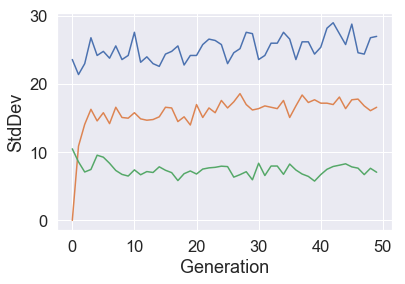

In [72]:
#Plotting Fitness: Converges VERY quickly.
fitness_file = "../"+TOP_FOLDER+"/fitness_summary.csv"
fitness_frame = pandas.read_csv(fitness_file, sep=" ")
sns.lineplot(x="Generation", y="Best_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="Median_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="StdDev", data=fitness_frame)

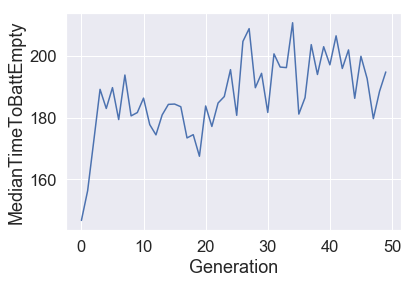

In [73]:
sns.lineplot(x="Generation", y="MedianTimeToBattEmpty", data=fitness_frame)

2505
     Battery    Poison      Food
0   0.049137 -0.125421 -0.208284
1   0.134556 -0.327155  0.274326
2   0.445383 -0.424742  0.606731
3   0.514543 -0.476247  0.742437
4   0.430596 -0.335713  0.641524
5   0.567447 -0.339153  0.572611
6   0.443086 -0.343130  0.659158
7   0.386725 -0.369081  0.820001
8   0.334493 -0.392625  0.782200
9   0.451995 -0.406132  0.789633
10  0.432744 -0.252395  0.861906
11  0.361308 -0.373478  0.789212
12  0.336048 -0.470188  0.710277
13  0.404904 -0.423528  0.709992
14  0.480953 -0.312283  0.717902
15  0.429824 -0.322113  0.696809
16  0.507749 -0.405382  0.722466
17  0.442799 -0.355714  0.772299
18  0.478062 -0.303074  0.698338
19  0.420328 -0.301820  0.656928
20  0.404465 -0.098374  0.770643
21  0.443837 -0.165162  0.674638
22  0.535086 -0.004244  0.668426
23  0.737447  0.008608  0.643749
24  0.698082  0.000000  0.643845
25  0.747400 -0.022821  0.621608
26  0.812008 -0.007773  0.762125
27  0.788621 -0.009730  0.767730
28  0.669715  0.000000  0.723271
29  0

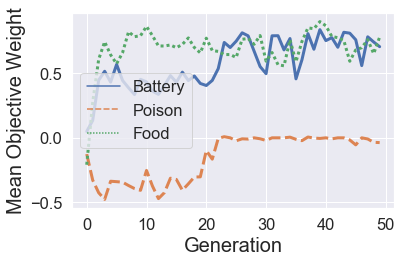

In [74]:
nn_output_file = "../"+TOP_FOLDER+"/nn_outputs_summary.csv"

import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

#Plotting NN outputs (that is, objective values) over generations.
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ")#, header=0, names=["Ammo", "Health", "Frags"])
#nn_out_frame.rename(columns={"Ammo": "Ammunition",
#                              "Health": "Health",
#                              "Frags": "Attack"}, inplace=True)
#print(nn_out_frame)
print(len(nn_out_frame))
summmary_nn_outputs=summarize_across_generations(nn_out_frame)
#summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
#print(summmary_nn_outputs)
summmary_nn_outputs=summmary_nn_outputs.drop("Generation",1) #Dropping since is same as index
print(summmary_nn_outputs)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Mean Objective Weight", fontsize=20)
ax=sns.lineplot(data=summmary_nn_outputs, linewidth = 3)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("objectives_over_generations.pdf")


## Comparing fitnesses

In [56]:
#Hardcoded rules seems to give significantly higher fitnesses?
shy_fitness = pandas.read_csv(shy_rewards_file, names = ["Defensive"])
shy_fitness2 = pandas.read_csv(shy_rewards_file2, names = ["\nDefensive2"])
all_ones_fitness = pandas.read_csv(all_ones_reward_file, names = ["Aggressive"])


dynamic_manual_rules_fitnesses = pandas.read_csv(manual_obj_rewards_file, names = ["\nHardcoded"])
print(dynamic_manual_rules_fitnesses)

evolved_nn_fitnesses_frame = pandas.read_csv(evolved_objectives_file, names = ["Evolved"])
print(evolved_nn_fitnesses_frame)

NameError: name 'shy_rewards_file' is not defined

In [30]:
import scipy.stats as st
print("Shy vs Dynamic: ", st.mannwhitneyu(shy_fitness, dynamic_manual_rules_fitnesses))
print("Shy vs Evolved: ", st.mannwhitneyu(shy_fitness, evolved_nn_fitnesses_frame))
print("Dynamic vs Evolved: ", st.mannwhitneyu(dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame))

Shy vs Dynamic:  MannwhitneyuResult(statistic=203.0, pvalue=0.0009862808982328683)
Shy vs Evolved:  MannwhitneyuResult(statistic=225.0, pvalue=0.0029989755444979624)
Dynamic vs Evolved:  MannwhitneyuResult(statistic=2.0, pvalue=4.586386355828241e-08)


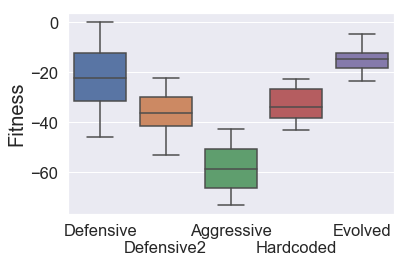

In [31]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
frames = [shy_fitness, shy_fitness2, all_ones_fitness, dynamic_manual_rules_fitnesses, evolved_nn_fitnesses_frame]
#print(evolved_nn_fitnesses_frame)
concatenated = pandas.concat(frames,sort=False)
plot=sns.boxplot(data=concatenated)
fig=plot.get_figure()
plt.ylabel("Fitness", fontsize=20)
fig.tight_layout()
fig.savefig('fitness_no_ammo.pdf', dpi=300)

In [10]:
#Shy has objective [1,1,-1]. Ones has objective [1,1,1].
#Evolved outperforms shy. That's interesting! It must have a different
#behavior, then? YES! A dynamic one!

## Analyzing behavior

In [75]:
import numpy as np
behavior_file = "../"+TOP_FOLDER+"/nn_behavior_measures_to_objectives.csv"
behavior_frame = pandas.read_csv(behavior_file, sep=" ")
behavior_frame.shape
#behavior_frame.rename(columns={"m_ammo": "Current Ammunition",
#                              "m_health": "Current Health",
#                              "m_frags": "Monsters Killed",
#                              "o_ammo":"Ammunition",
#                              "o_health":"Health",
#                              "o_frags":"Attack"}, inplace=True)
print(behavior_frame)

      m_battery  m_poisons     m_food  o_battery  o_poisons   o_foods  \
0           0.0   0.000000   0.000000   0.330112        0.0  1.000000   
1           0.0   1.052632   0.000000   0.330112        0.0  0.284585   
2           0.0   2.105263   0.000000   0.330112        0.0  0.284585   
3           0.0   3.157895   0.000000   0.330112        0.0  0.284585   
4           0.0   4.210526   0.000000   0.330112        0.0  0.284585   
5           0.0   5.263158   0.000000   0.330112        0.0  0.284585   
6           0.0   6.315789   0.000000   0.330112        0.0  0.284585   
7           0.0   7.368421   0.000000   0.330112        0.0  0.284585   
8           0.0   8.421053   0.000000   0.330112        0.0  0.284585   
9           0.0   9.473684   0.000000   0.330112        0.0  0.284585   
10          0.0  10.526316   0.000000   0.330112        0.0  0.284585   
11          0.0  11.578947   0.000000   0.330112        0.0  0.284585   
12          0.0  12.631579   0.000000   0.330112   

In [76]:
#Method for summarizing and plotting averages for 1 measurement.
def summarize_measurement_and_plot_objectives(dataframe, main_objective):
    meas_to_objectives_array = []
    unique_main_measures = dataframe[main_objective].unique()
    for unique_measure in unique_main_measures:
        #All frames with given value for the column
        sub_frame=dataframe.loc[dataframe[main_objective] == unique_measure]
        objective_means = [sub_frame["o_battery"].mean(), sub_frame["o_poisons"].mean(),sub_frame["o_foods"].mean()]
        meas_to_objectives_array.append([unique_measure,*objective_means])

    meas_to_objectives_array=np.array(meas_to_objectives_array)
    df = pandas.DataFrame(meas_to_objectives_array, columns=[main_objective, 'o_battery', 'o_poisons', 'o_foods'])
    ax=df.plot(x=main_objective, y=['o_battery', 'o_poisons', 'o_foods'], linewidth=5)
    fig=ax.get_figure()
    plt.ylabel("Objective Weight", fontsize=20)
    fig.tight_layout()
    fig.savefig(main_objective.replace(" ","")+".pdf")


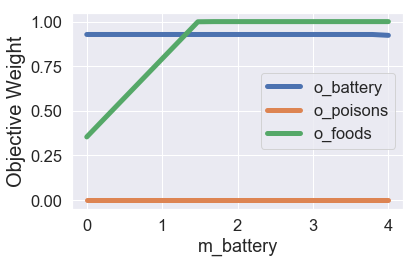

In [77]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_battery')

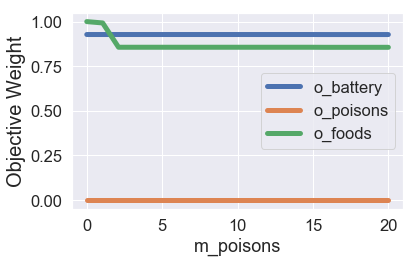

In [78]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_poisons')

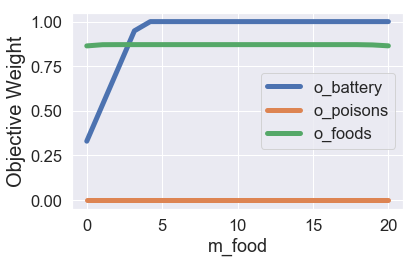

In [79]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_food')
